In [1]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


### logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
# 訓練多類別邏輯回歸模型
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_after_selection, y_train)
# 進行預測
y_pred = model.predict(X_test_after_selection)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 顯示混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 顯示分類報告（Precision, Recall, F1-score）
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


c:\Users\yehch\Downloads\test\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6611
Confusion Matrix:
[[2461   84 1011]
 [ 532 3102 2190]
 [1507 1454 7659]]
Classification Report:
              precision    recall  f1-score   support

        Good       0.55      0.69      0.61      3556
        Poor       0.67      0.53      0.59      5824
    Standard       0.71      0.72      0.71     10620

    accuracy                           0.66     20000
   macro avg       0.64      0.65      0.64     20000
weighted avg       0.67      0.66      0.66     20000



### Dnn

In [36]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical target variable to numeric
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_train

array([2, 2, 2, ..., 2, 2, 1])

In [37]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical target variable to numeric
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)
y_test

array([2, 1, 0, ..., 1, 2, 2])

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from tensorflow.keras.utils import to_categorical


X_train_scaled = X_train_after_selection
X_test_scaled = X_test_after_selection

# 將目標變數 y 轉換為 one-hot 編碼
# y_train_encoded = y_train
# y_test_encoded = y_test
y_train_encoded = to_categorical(y_train, num_classes=3)  # Ensure 3 classes
y_test_encoded = to_categorical(y_test, num_classes=3) 
# 構建多類別 DNN 模型
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 輸出層，3 個類別

# 編譯模型
# from tensorflow.keras.optimizers import SGD

# optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
history = model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

# 預測
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


c:\Users\yehch\Downloads\test\.conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6637 - loss: 0.7336 - val_accuracy: 0.7028 - val_loss: 0.6787
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6975 - loss: 0.6817 - val_accuracy: 0.7060 - val_loss: 0.6686
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7006 - loss: 0.6700 - val_accuracy: 0.7116 - val_loss: 0.6640
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7043 - loss: 0.6647 - val_accuracy: 0.7138 - val_loss: 0.6615
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7075 - loss: 0.6605 - val_accuracy: 0.7106 - val_loss: 0.6636
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7129 - loss: 0.6444 - val_accuracy: 0.7139 - val_loss: 0.6572
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7196 - loss: 0.6387 - val_accuracy: 0.7136 - val_loss: 0.6566
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7209 - loss: 0.6314 -

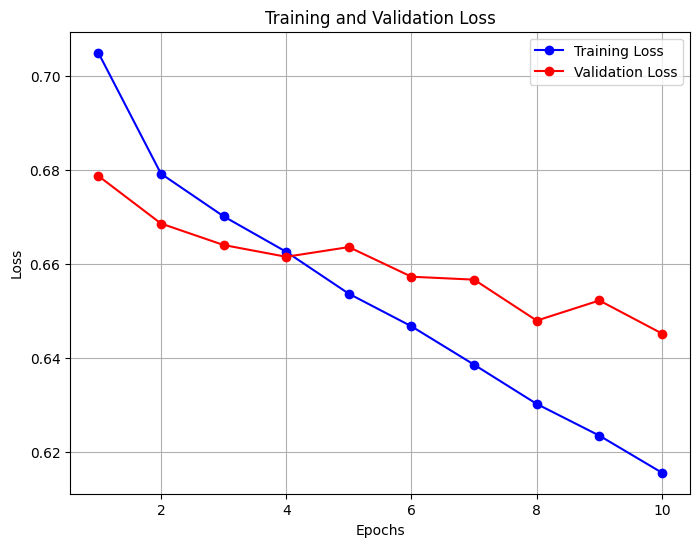

In [51]:
import matplotlib.pyplot as plt

# 假設 `history` 是訓練後得到的結果
history_dict = history.history

# 獲取 loss 和 val_loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# 設定 x 軸為 epochs
epochs = range(1, len(loss) + 1)

# 畫圖
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' 表示藍色圓點
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')  # 'ro-' 表示紅色圓點
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [52]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',   # 監控驗證損失
    patience=10,           # 容忍驗證損失不改善的 epoch 數
    restore_best_weights=True  # 恢復至驗證集表現最好的權重
)

history = model.fit(
    X_train_scaled, y_train_encoded,
    validation_split=0.2,
    epochs=100,
    batch_size = 32,
    callbacks=[early_stopping]
)


Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7327 - loss: 0.6082 - val_accuracy: 0.7189 - val_loss: 0.6469
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7344 - loss: 0.5989 - val_accuracy: 0.7229 - val_loss: 0.6468
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7407 - loss: 0.5879 - val_accuracy: 0.7228 - val_loss: 0.6413
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7410 - loss: 0.5871 - val_accuracy: 0.7261 - val_loss: 0.6446
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7497 - loss: 0.5779 - val_accuracy: 0.7296 - val_loss: 0.6456
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7514 - loss: 0.5690 - val_accuracy: 0.7188 - val_loss: 0.6570
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7527 - loss: 0.5642 - val_accuracy: 0.7274 - val_loss: 0.6430
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7590 - loss: 0

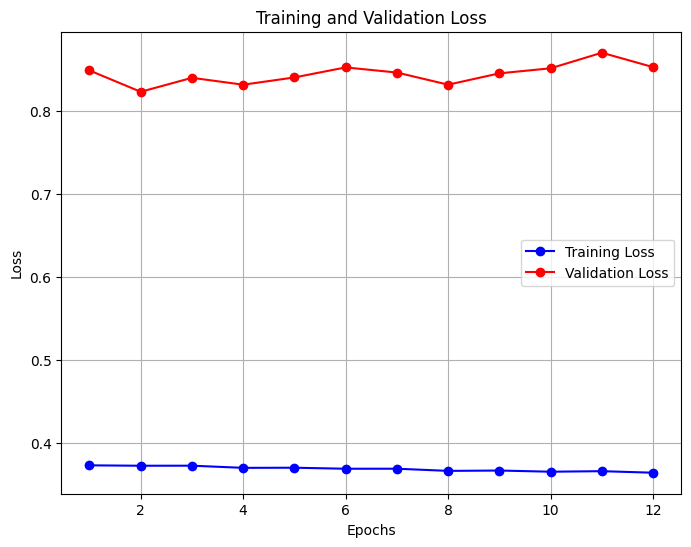

In [47]:
import matplotlib.pyplot as plt

# 假設 `history` 是訓練後得到的結果
history_dict = history.history

# 獲取 loss 和 val_loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# 設定 x 軸為 epochs
epochs = range(1, len(loss) + 1)

# 畫圖
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' 表示藍色圓點
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')  # 'ro-' 表示紅色圓點
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

xgboost

In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb


X_train_scaled = X_train_after_selection
X_test_scaled = X_test_after_selection

# 將目標變數 y 轉換為 one-hot 編碼
# y_train_encoded = y_train
# y_test_encoded = y_test
y_train_encoded = y_train  # Ensure 3 classes
y_test_encoded = y_test
# 加載數據
# df = pd.read_csv("data.csv")
# X = df.drop('target', axis=1)
# y = df['target']

# 分割數據
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 訓練模型
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    objective='multi:softmax',
    num_class=len(np.unique(y_train_encoded))
)
xgb_model.fit(X_train_scaled, y_train_encoded)

# 預測與評估
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test_encoded, y_pred))


Confusion Matrix:
[[2493   98  965]
 [ 398 3955 1471]
 [1271 1242 8107]]
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.60      0.70      0.65      3556
           1       0.75      0.68      0.71      5824
           2       0.77      0.76      0.77     10620

    accuracy                           0.73     20000
   macro avg       0.70      0.71      0.71     20000
weighted avg       0.73      0.73      0.73     20000

